### Run graph cut reimplementation from scratch use ford fulkerson algorithm

In [1]:
import numpy as np
from graph_cut.graphcut_reimplementation.graphcut import GraphCut
from matplotlib import pyplot as plt

Maximum Flow:  23
Minimum Cut Nodes:  [ True  True  True False  True False]


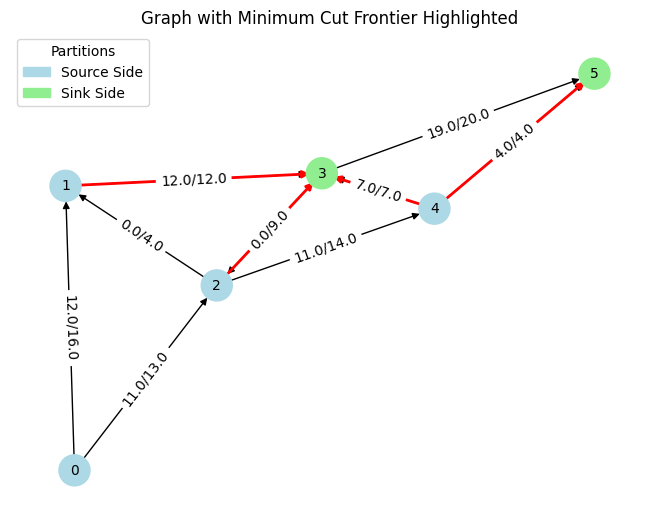

In [3]:
# Example usage 2 (small graph to display result)
g = GraphCut(6)
g.add_edge(0, 1, 16)
g.add_edge(0, 2, 13)
g.add_edge(1, 2, 10)
g.add_edge(1, 3, 12)
g.add_edge(2, 1, 4)
g.add_edge(2, 4, 14)
g.add_edge(3, 2, 9)
g.add_edge(3, 5, 20)
g.add_edge(4, 3, 7)
g.add_edge(4, 5, 4)

source = 0
sink = 5
max_flow = g.ford_fulkerson(source, sink)
min_cut_nodes = g.min_cut(source)

print("Maximum Flow: ", max_flow)
print("Minimum Cut Nodes: ", min_cut_nodes)
g.display_graph_and_min_cut(source, sink)

In [2]:
# Example usage 1 (large graph)
width = 1000
height = 1000
g = GraphCut(width*height)
for i in range(width-1):
    for j in range(height-1):
      node = i*height + j
      g.add_edge(node, node+1, np.random.randint(1,9))
      g.add_edge(node, node+width, np.random.randint(1,9))

source = 0
sink = 1000000-2
max_flow = g.ford_fulkerson(source, sink)

min_cut_nodes = g.min_cut(source)

max_flow

6

### How to use the SegmentationDataset ?

Found annotations at 'C:\Users\ab910\fiftyone\coco-2017\raw\instances_val2017.json'
Sufficient images already downloaded
Existing download of split 'validation' is sufficient
Loading existing dataset 'coco-2017-validation-25'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


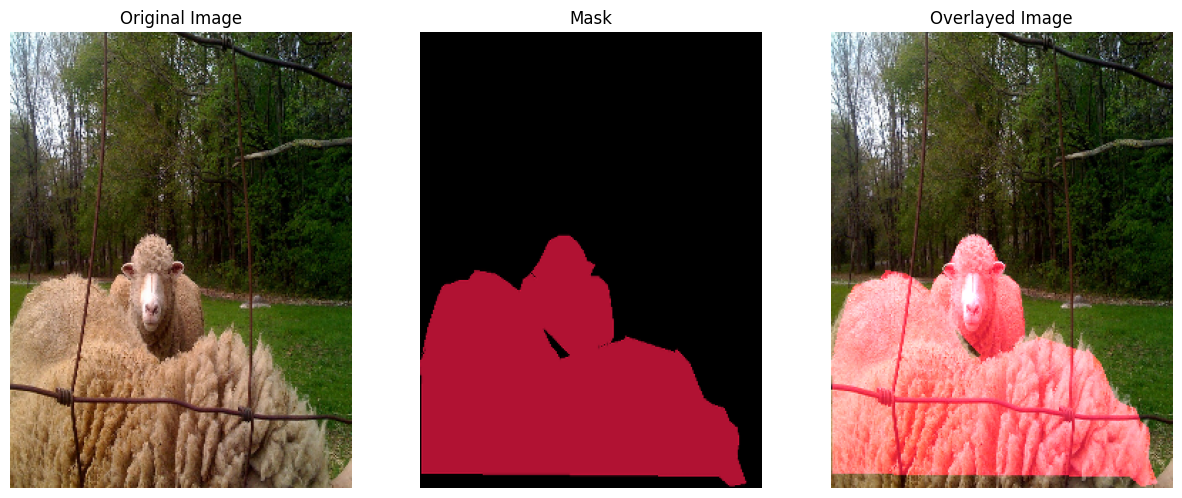

In [4]:
from load_segmentation_dataset import SegmentationDataset

dataset =SegmentationDataset( classes = ["sheep", "cow", "elephant"], nb_samples= 25, resize_factor=0.5)

dataset.display_sample(10)

In [6]:
img, mask, labels = dataset.__getitem__(10)
labels

['sheep']